# Model Figures

In [1]:
from os.path import join
import numpy as np
import xarray as xr
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import ternary

In [3]:
import arviz as az

In [4]:
from matplotlib import style

In [5]:
style.use(join("..", "style.mplstyle"))

## load model results

In [6]:
prior = xr.load_dataset("../model-results/prior.nc")
post = xr.load_dataset("../model-results/posterior.nc")

## define labels

In [7]:
GDGTs = ["G0", "G1", "G2", "G3", "G4", "Cren", "Cren regio"]
communities = [
    "planktonic",
    "benthic-methane cycling",
    "benthic-non-methane cycling",
]
locations = ["Astoria Canyon", "Hydrate Ridge", "Mcarthur Canyon"]

## figures

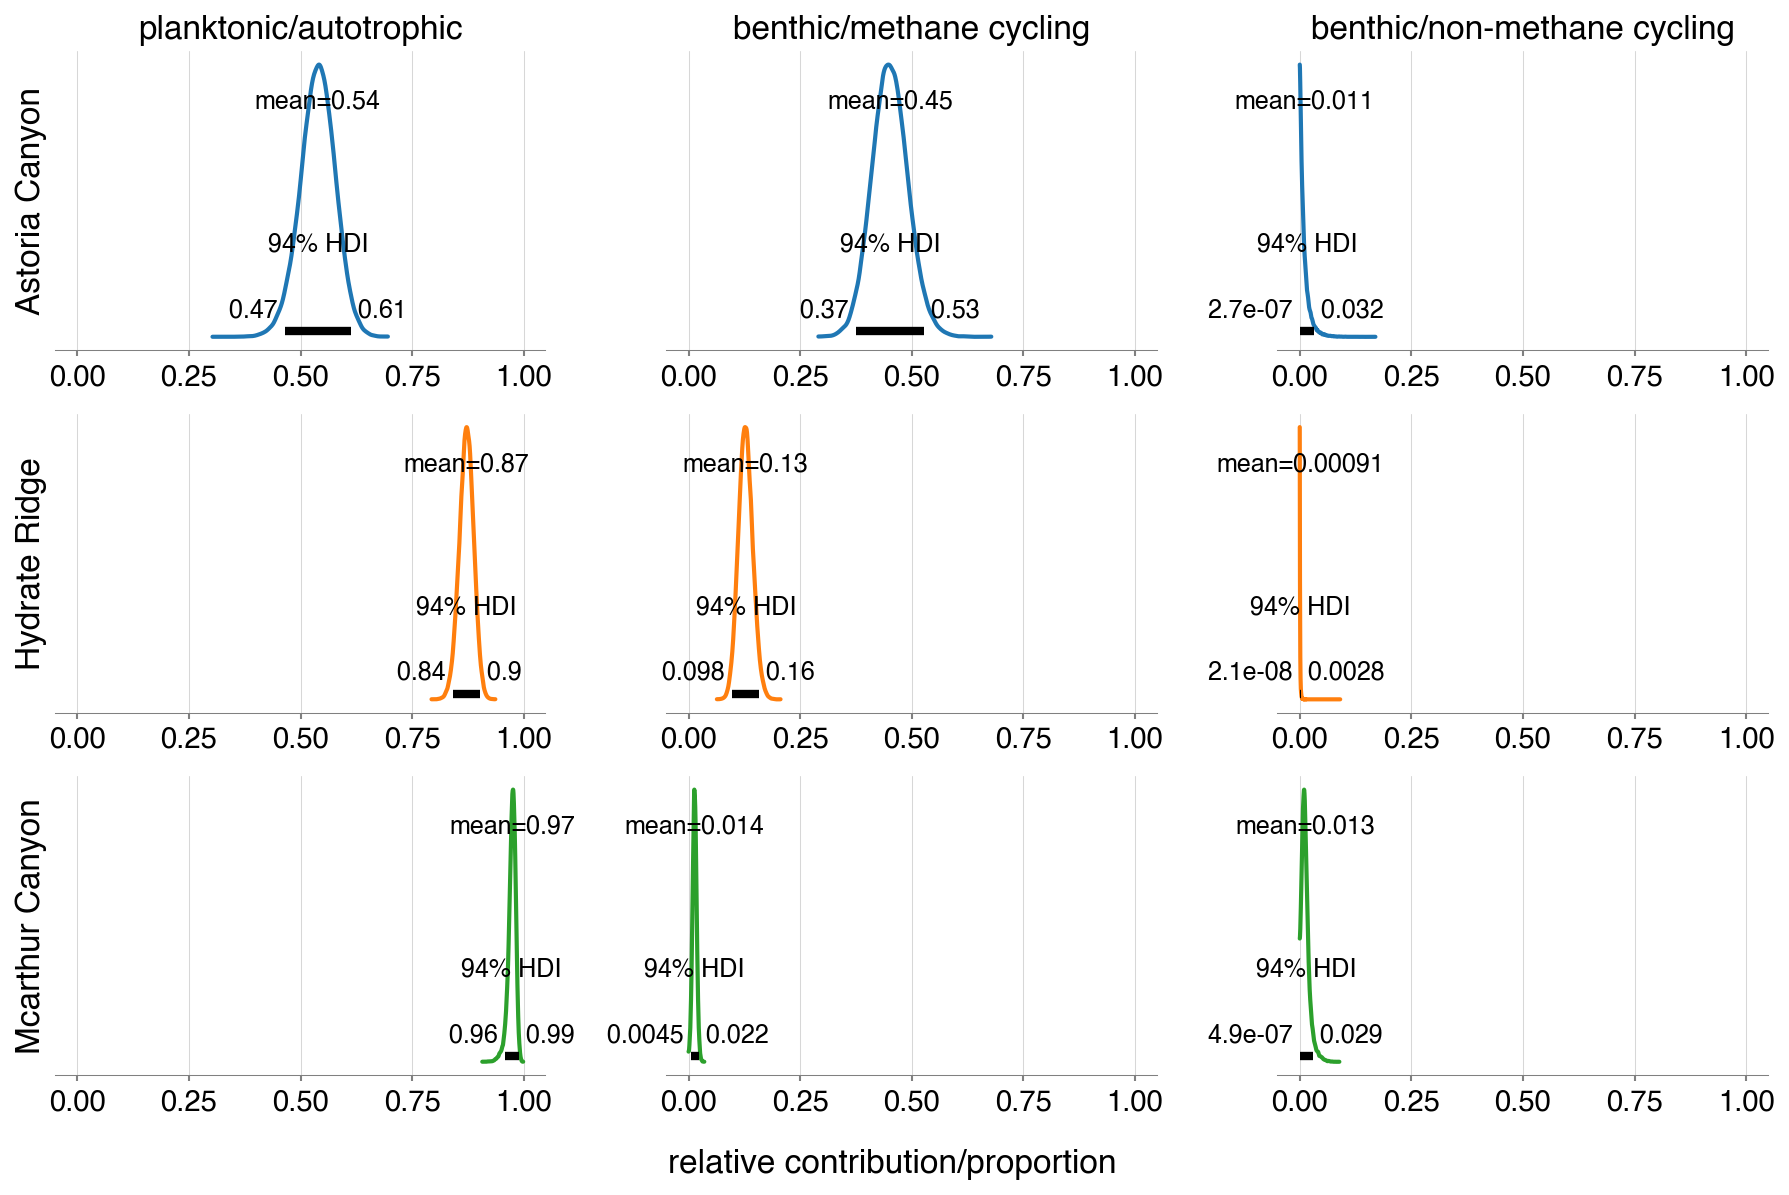

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for i, location in enumerate(locations):
    axs[i, 0].set_ylabel(location, fontsize=16)
for j, com in enumerate(communities):
    for i in range(3):
        az.plot_posterior(post["F"][:, :, i, j], ax=axs[i, j], color=f"C{i}")
    axs[0, j].set_title(com, fontsize=16)
    for i in (1, 2):
        axs[i, j].set_title(None)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()

/Users/markbaum/Library/Caches/pypoetry/virtualenvs/cascadia-margin-lipids-mMstoHi0-py3.11/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


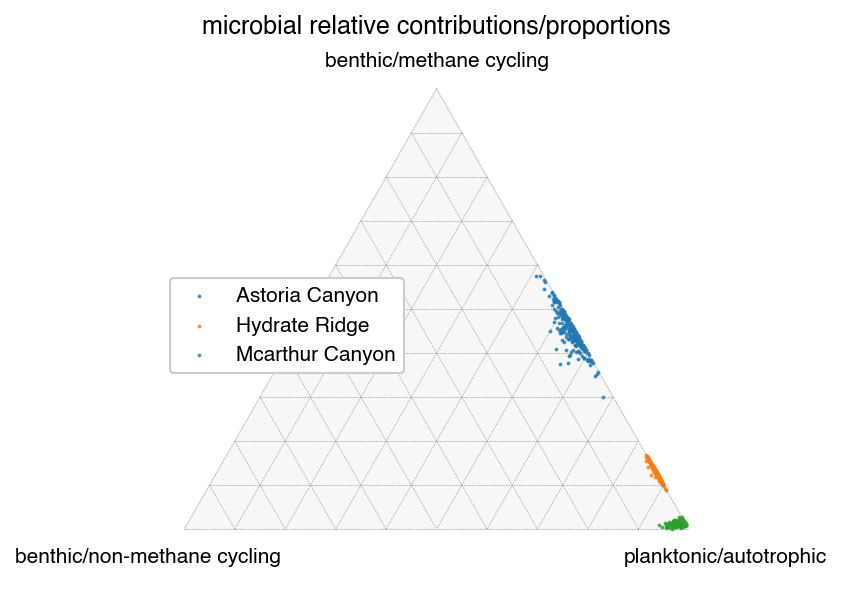

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
tax = ternary.TernaryAxesSubplot(ax=ax)
ax.axis("off")
tax.gridlines(color="grey", alpha=0.5, multiple=0.1)
tax.right_corner_label(communities[0])
tax.top_corner_label(communities[1], va="top")
tax.left_corner_label(communities[2])
for i, location in enumerate(locations):
    tax.scatter(
        (post["F"].values[j % 4, j, i, :] for j in range(250)),
        s=0.75,
        alpha=0.75,
        color=f"C{i}",
        label=location,
    )
ax.legend(loc="center left")
fig.suptitle("microbial relative contributions/proportions")
fig.tight_layout()

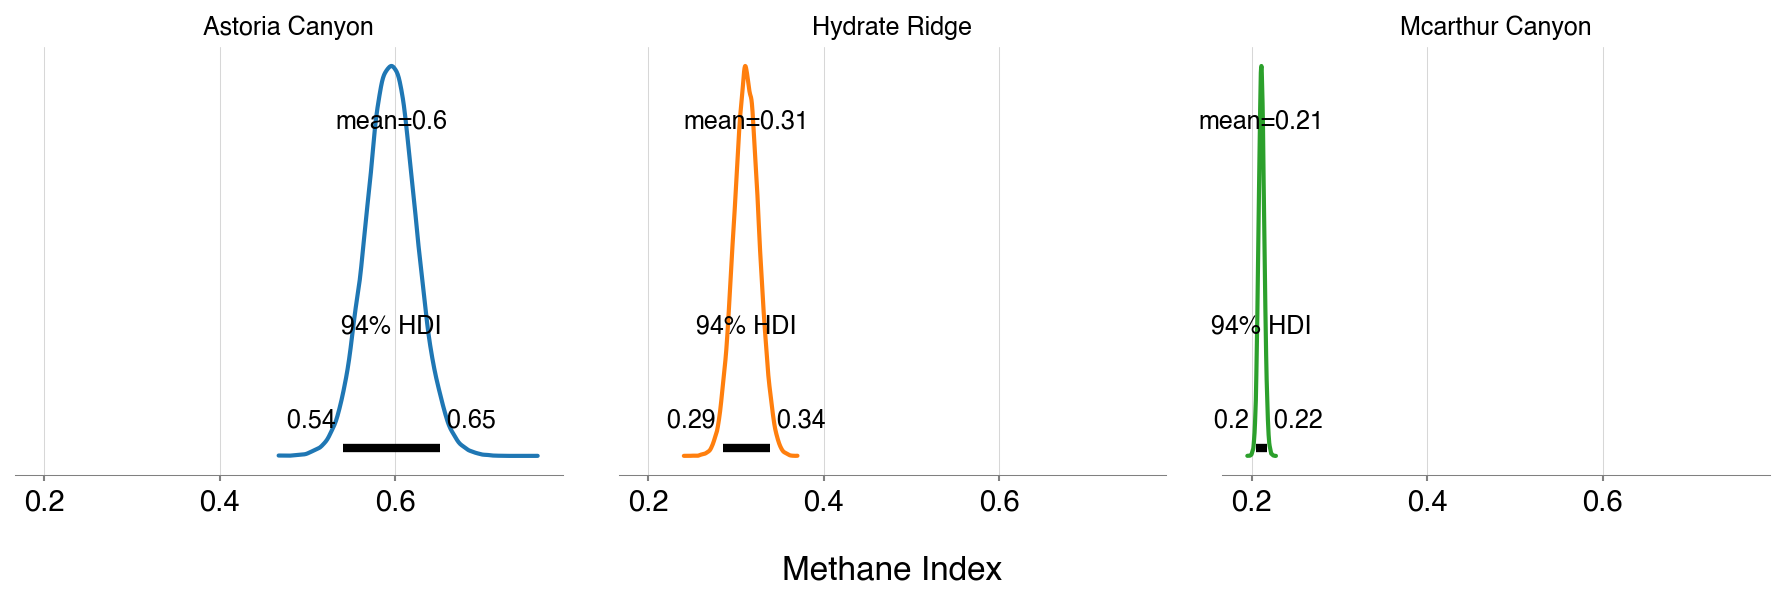

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
for i, ax in enumerate(axs):
    az.plot_posterior(post["Methane Index"][:, :, i], color=f"C{i}", ax=ax)
    ax.set_title(locations[i])
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()

In [11]:
x = post["F"].stack(sample=("chain", "draw"))[i, 1, :].values
x = np.random.choice(x.shape[0], size=1000, replace=False)
x.shape

(1000,)

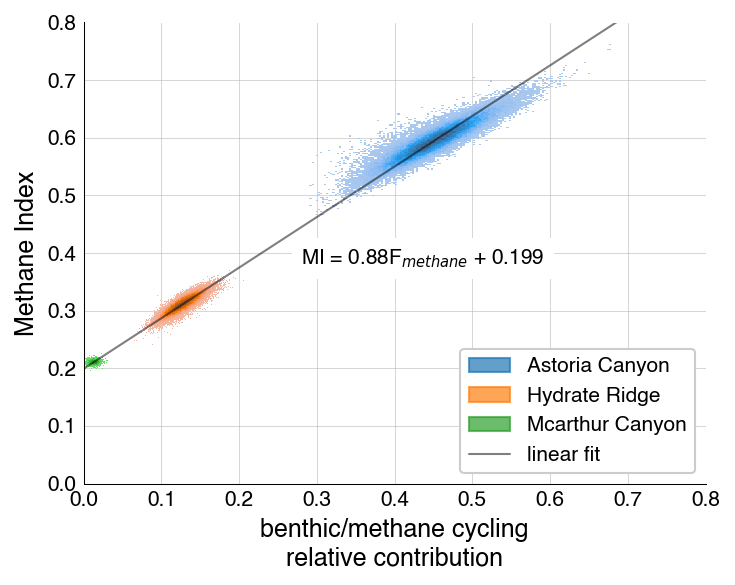

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
# plot posterior histograms
for i, location in enumerate(locations):
    x = post["F"].stack(sample=("chain", "draw"))[i, 1, :].values
    y = post["Methane Index"].stack(sample=("chain", "draw"))[i, 0, :].values
    sns.histplot(x=x, y=y, color=f"C{i}", label=location, ax=ax)
# plot regression through posterior means
x = post["F"].mean(dim=("chain", "draw")).values[:, 1]
y = post["Methane Index"].mean(dim=("chain", "draw")).values.flatten()
reg = stats.linregress(x, y)
x = np.linspace(0, 0.7, 10)
y = reg.slope * x + reg.intercept
h = ax.plot(x, y, "k", alpha=0.5, linewidth=1, label="linear fit")
ax.annotate(
    "MI = " + f"{reg.slope:0.2g}" + "F$_{methane}$" + f" + {reg.intercept:0.3g}",
    (0.28, 0.38),
    backgroundcolor="w",
)
# add legend and formatting
ax.legend(
    handles=[
        mpatches.Patch(color="C0", label=locations[0], alpha=0.7),
        mpatches.Patch(color="C1", label=locations[1], alpha=0.7),
        mpatches.Patch(color="C2", label=locations[2], alpha=0.7),
        h[0],
    ],
    loc="lower right",
)
# ax.plot([0, 0.8], [0, 0.8], linestyle="--", color="k", linewidth=0.75, alpha=0.5, zorder=0)
ax.set_xlabel(f"{communities[1]}\nrelative contribution")
ax.set_ylabel("Methane Index")
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
fig.tight_layout()

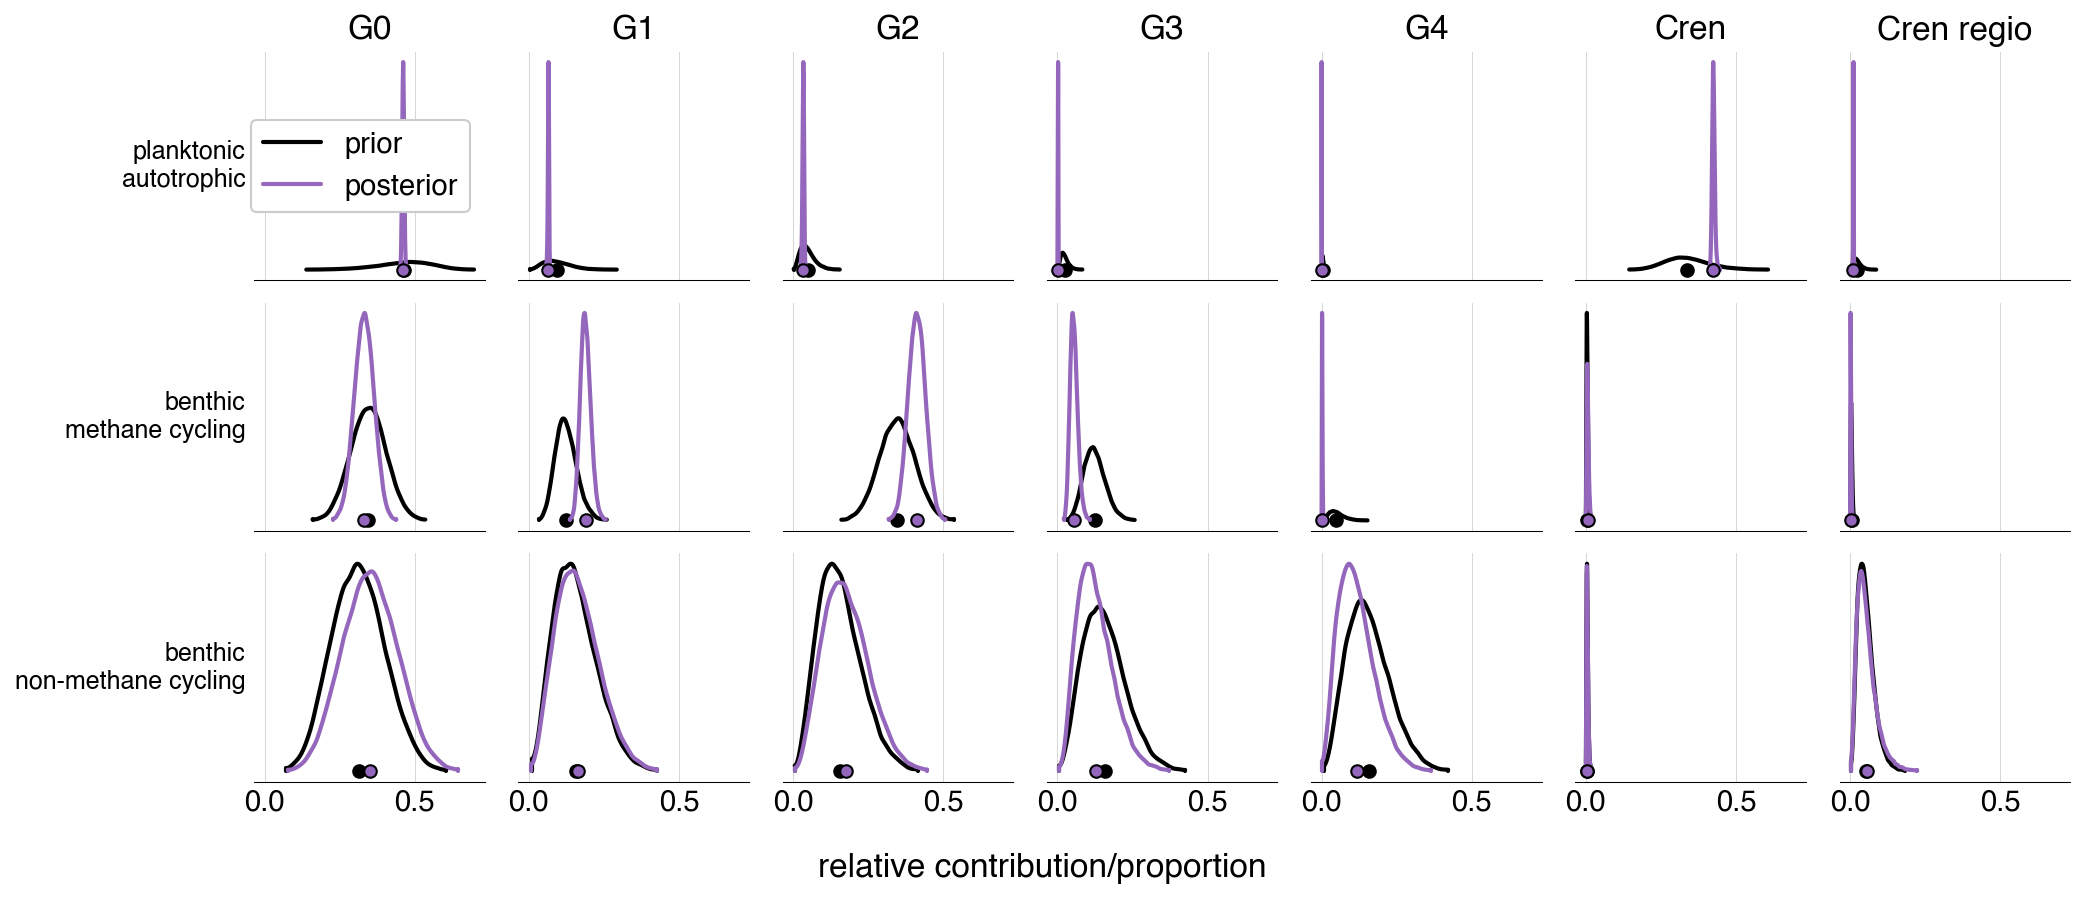

In [13]:
fig, axs = plt.subplots(3, 7, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["X"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, com in enumerate(communities):
    axs[i, 0].set_ylabel(
        com.replace("/", "\n"), rotation=0, va="center", ha="right", fontsize=12
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()

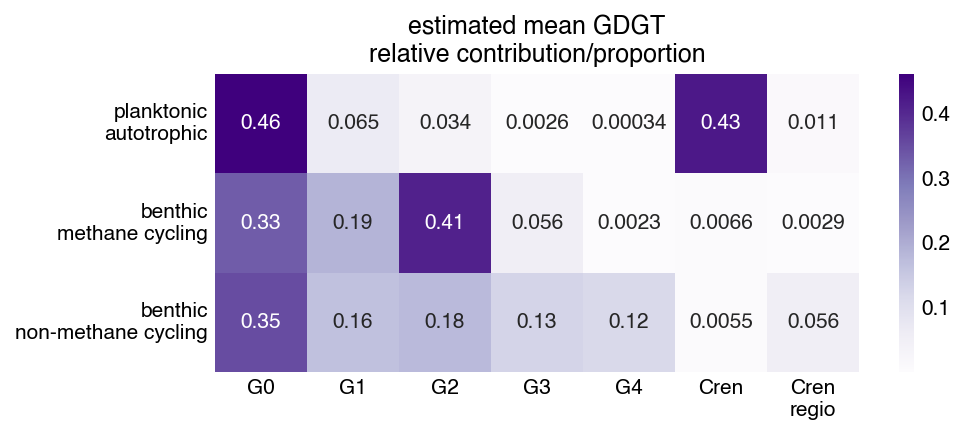

In [14]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(post["X"].mean(dim=("chain", "draw")), annot=True, cmap="Purples", ax=ax)
ax.set_yticklabels([com.replace("/", "\n") for com in communities], rotation=0)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs])
ax.set_title("estimated mean GDGT\nrelative contribution/proportion")
fig.tight_layout()

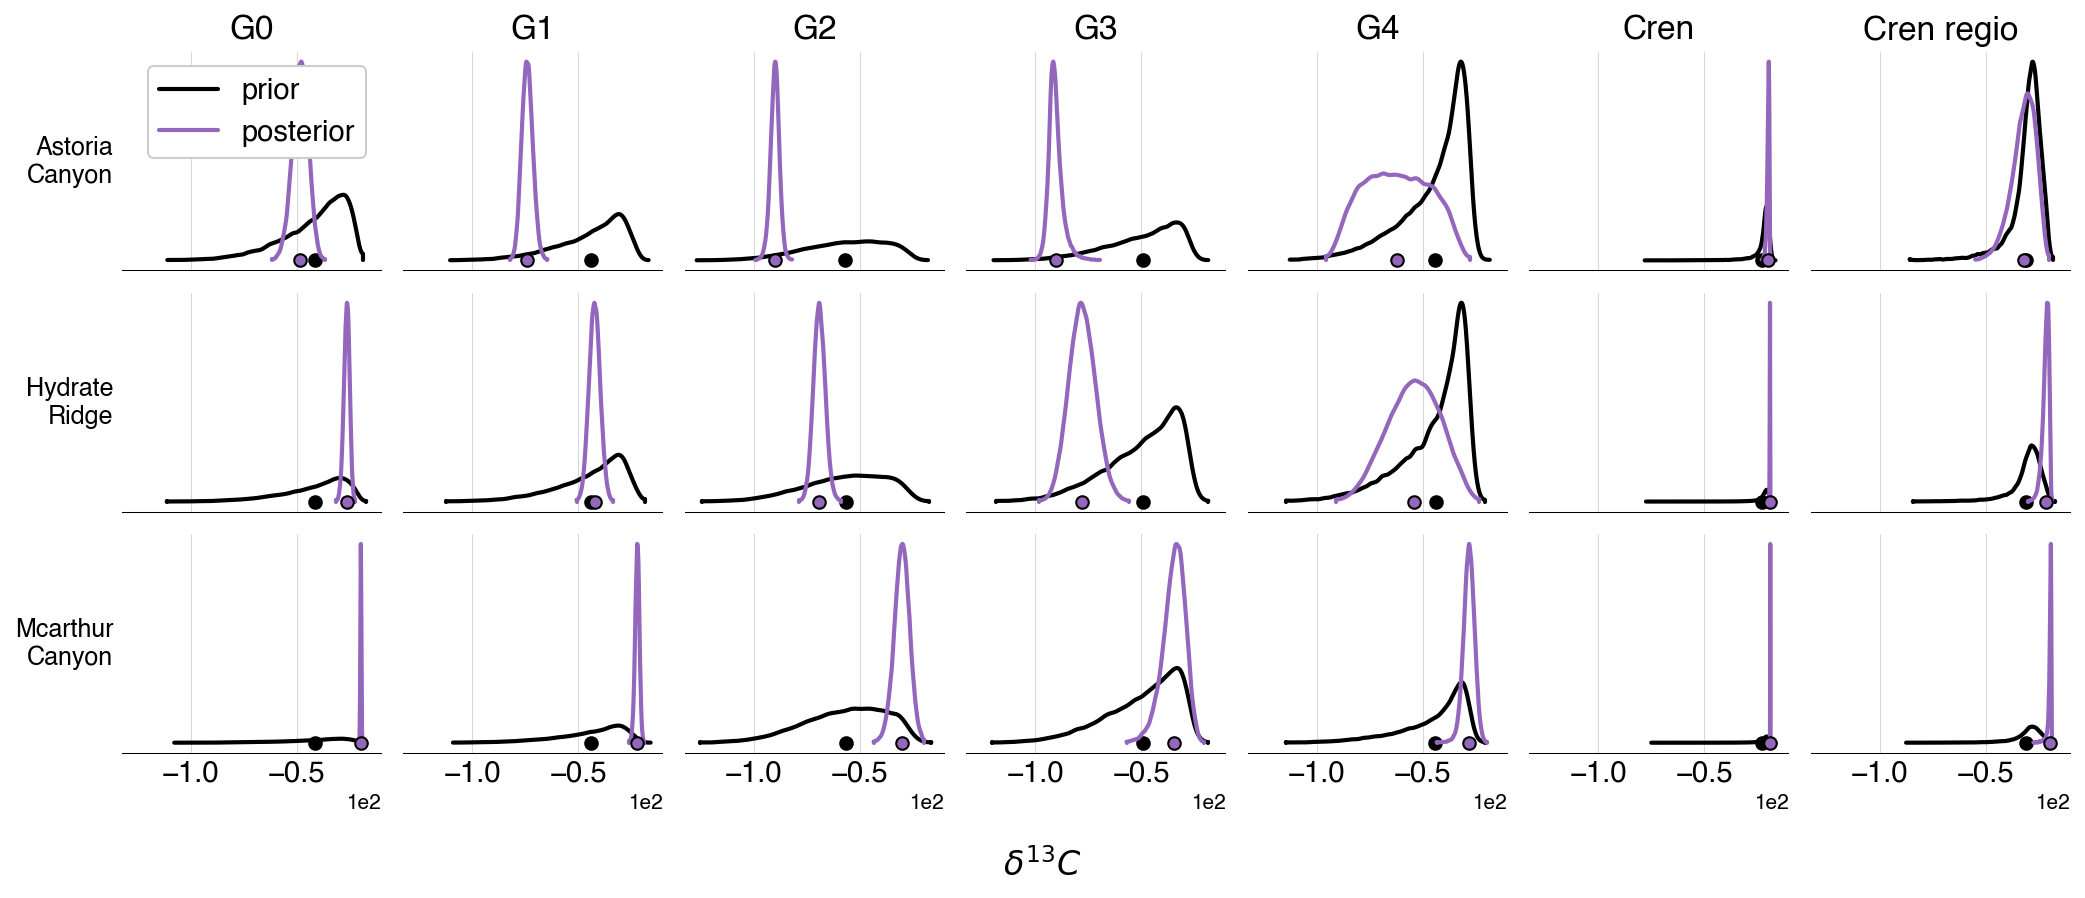

In [15]:
fig, axs = plt.subplots(3, 7, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["C"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, loc in enumerate(locations):
    axs[i, 0].set_ylabel(
        loc.replace(" ", "\n"), rotation=0, va="center", ha="right", fontsize=12
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()

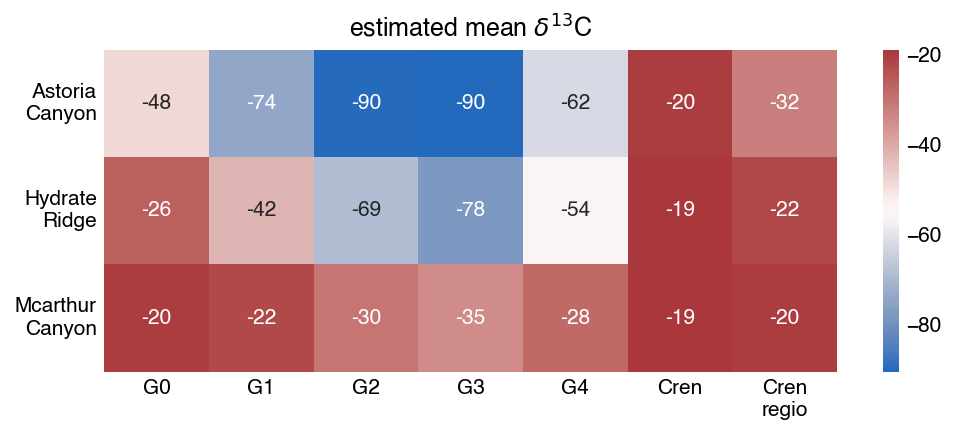

In [16]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(post["C"].mean(dim=("chain", "draw")), annot=True, cmap="vlag", ax=ax)
ax.set_yticklabels([loc.replace(" ", "\n") for loc in locations], rotation=0)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs])
ax.set_title("estimated mean $\delta ^{13}$C")
fig.tight_layout()

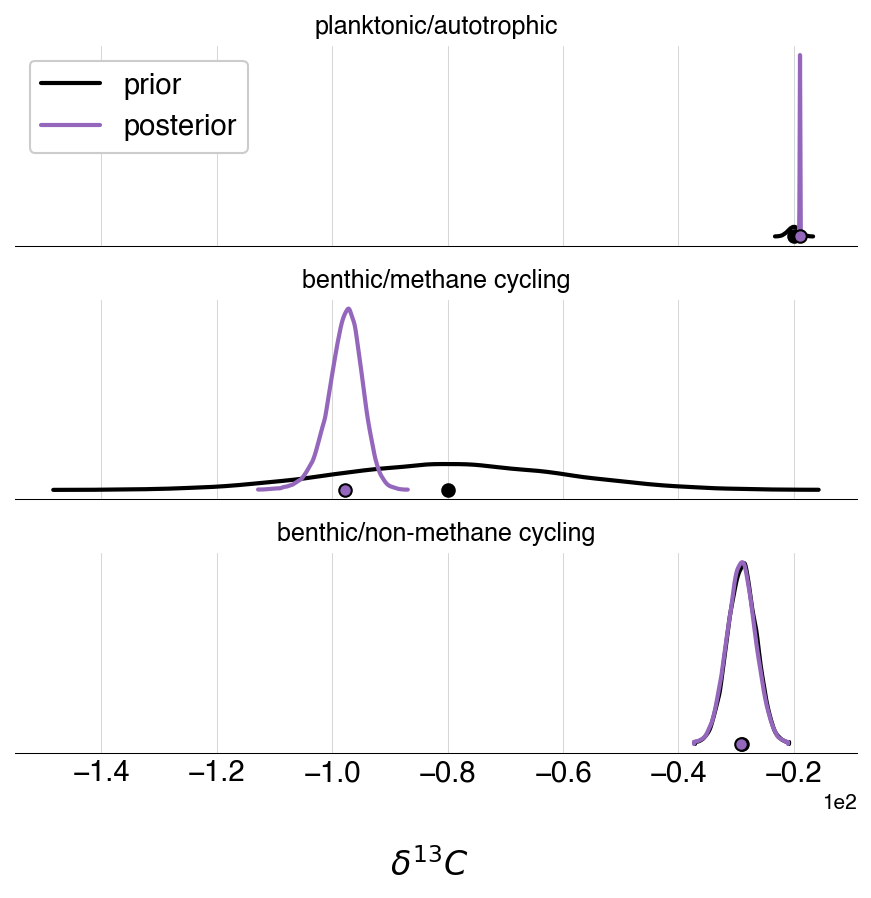

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["D"],
    data_labels=["prior", "posterior"],
    colors=["k", "C4"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(communities[i])
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()